<a href="https://colab.research.google.com/github/Shravani11082005/DST-Assignments/blob/main/Assignment_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Step 2: Load California Housing dataset
california = fetch_california_housing()

# Create features and target
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target, name='MedHouseVal')

# Preview data
X.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [3]:
# Step 3: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")


Training set: (16512, 8)
Testing set: (4128, 8)


In [4]:
# Step 4: Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [5]:
# Step 5: Predict on the test set
y_pred = model.predict(X_test)

# Display some predictions
pd.DataFrame({'Actual': y_test.values[:5], 'Predicted': y_pred[:5]})


,Actual,Predicted
0,0.47700,0.719123
1,0.45800,1.764017
2,5.00001,2.709659
3,2.18600,2.838926
4,2.78000,2.604657


In [6]:
# Step 6: Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R-squared Score (R²): {r2:.4f}")


Mean Absolute Error (MAE): 0.5332
Mean Squared Error (MSE): 0.5559
R-squared Score (R²): 0.5758


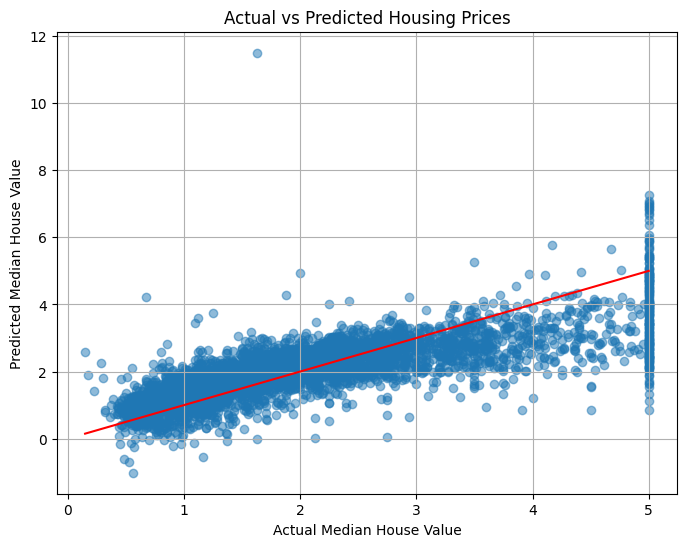

In [7]:
# Plot true vs predicted prices
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Housing Prices")
plt.grid(True)
plt.show()


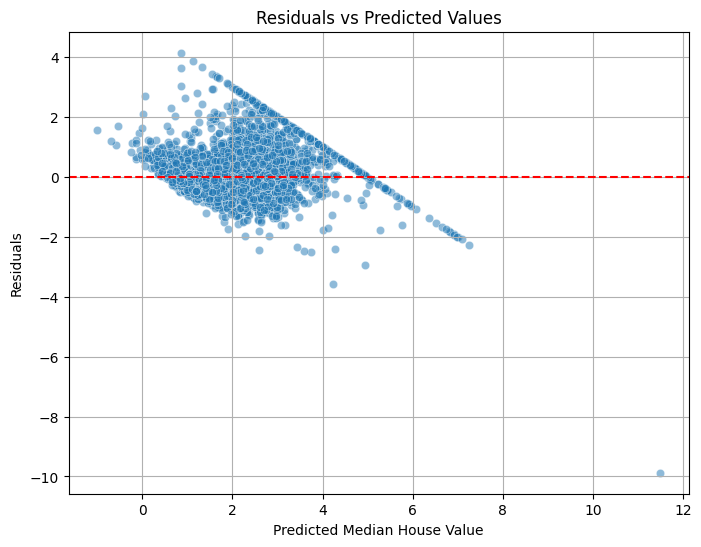

In [8]:
# Residual plot: residuals vs predicted values
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Median House Value")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.grid(True)
plt.show()
